In [173]:
#Imports
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing 

In [174]:
#These first few cells will be the same as the EDA notebook

In [175]:
main_df = pd.read_csv('Pitching_Data_Through_2022_08_07.csv')

In [176]:
main_df.head()

,Unnamed: 0,Name,Team,W,ER,SO,H,BB,CG,HBP,...,FB%_Opp,HR/FB_Opp,Soft%_Opp,Med%_Opp,Hard%_Opp,Pk_Fct_Overall,Pk_Fct_HR,Pk_Fct_SO,Temp,Wind
0,0,Tyler Anderson,LAD,1,0,3,2,1,0,0,...,35.9,8.8,19.9,50.4,29.6,101,125,105,92.0,4.0
1,1,Zach Davies,ARI,0,0,3,4,2,0,0,...,33.4,10.7,18.3,52.2,29.5,101,81,96,72.0,3.0
2,2,Kevin Gausman,TOR,0,0,5,6,0,0,0,...,37.4,13.4,13.8,52.0,34.2,97,94,100,72.0,3.0
3,3,Triston McKenzie,CLE,1,0,8,2,1,0,0,...,38.9,13.5,16.2,53.8,30.1,100,98,102,86.0,3.0
4,4,Jesus Luzardo,MIA,1,0,6,1,1,0,0,...,33.0,14.8,18.2,50.0,31.8,99,99,105,78.0,4.0


In [177]:
main_df.drop(columns = ['Unnamed: 0'], inplace = True)

In [178]:
main_df.shape

(1194, 90)

In [179]:
#Dropping rows that contribute to fantasy points
#Also dropping K% and BB% since we're more interested in a pitcher's K/9 and BB/9
#Also dropping CG_Season and ShO_Season since they're so rare
#Dropping OBP and SLG since we have OPS (on-base plus slugging)
#Dropping xFIP since we have FIP and wRC+ since we have wRC
#Dropping GB% and FB% since and GB_Opp% and FB_Opp% since we have GB/FB for both
#Dropping Outs_Season since we have Avg_Outs
main_df = main_df.drop(columns = ['W', 'ER', 'SO', 'H', 'BB', 'CG', 'HBP', 'ShO', 'Outs', 'QS', 'K%', 'BB%',\
                                 'CG_Season', 'ShO_Season', 'OBP', 'SLG', 'xFIP', 'wRC+', 'GB%', 'FB%',\
                                 'GB%_Opp', 'FB%_Opp', 'CGS', 'NH', 'Outs_Season', 'Proj_Runs', 'Park', 'Hand', 'Opp_Team',\
                                 'Team_Season', 'Position'])

In [180]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 59 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            1194 non-null   object 
 1   Team            1194 non-null   object 
 2   Date            1194 non-null   object 
 3   GS              1194 non-null   float64
 4   Avg_Outs        1194 non-null   float64
 5   W_Season        1194 non-null   float64
 6   ERA             1194 non-null   float64
 7   K/9             1194 non-null   float64
 8   BB/9            1194 non-null   float64
 9   K/BB            1194 non-null   float64
 10  HR/9            1194 non-null   float64
 11  AVG             1194 non-null   float64
 12  BABIP           1194 non-null   float64
 13  FIP             1194 non-null   float64
 14  SIERA           1194 non-null   float64
 15  WHIP            1194 non-null   float64
 16  GB/FB           1194 non-null   float64
 17  LD%             1194 non-null   f

In [181]:
main_df_num = main_df.select_dtypes(include = ['int64', 'float64'])

In [182]:
main_df_corr = main_df_num.corr()

In [183]:
main_df_corr

,GS,Avg_Outs,W_Season,ERA,K/9,BB/9,K/BB,HR/9,AVG,BABIP,...,LD%_Opp,HR/FB_Opp,Soft%_Opp,Med%_Opp,Hard%_Opp,Pk_Fct_Overall,Pk_Fct_HR,Pk_Fct_SO,Temp,Wind
GS,1.000000,0.612585,0.716807,-0.222785,0.082452,-0.154689,0.141815,-0.202110,-0.176407,-0.083836,...,0.011113,0.007079,-0.019751,0.021313,-0.005395,-0.021005,-0.010725,0.018261,0.025442,0.010607
Avg_Outs,0.612585,1.000000,0.582005,-0.391464,0.060450,-0.311532,0.300621,-0.234053,-0.303442,-0.222724,...,0.014143,0.023228,-0.018813,0.023027,-0.005956,0.013489,0.050774,0.032654,0.055346,-0.004621
W_Season,0.716807,0.582005,1.000000,-0.423023,0.197056,-0.302728,0.351296,-0.302528,-0.360772,-0.188225,...,0.026564,-0.005161,0.022192,0.003851,-0.017926,-0.035920,0.021304,0.107933,-0.000965,0.047409
ERA,-0.222785,-0.391464,-0.423023,1.000000,-0.163047,0.367060,-0.346828,0.632280,0.752855,0.531139,...,0.009036,-0.021734,-0.015422,0.038625,-0.020989,0.054796,-0.030562,-0.103201,0.005245,-0.019806
K/9,0.082452,0.060450,0.197056,-0.163047,1.000000,0.040437,0.513107,-0.010659,-0.352940,0.118580,...,0.032903,0.009352,0.050097,-0.017321,-0.019565,0.069992,0.135581,0.168725,-0.025198,0.055241
BB/9,-0.154689,-0.311532,-0.302728,0.367060,0.040437,1.000000,-0.690995,0.049966,0.138826,0.163656,...,0.011743,0.037851,-0.029699,0.027619,-0.002588,0.048600,0.010919,-0.062670,0.008414,-0.055206
K/BB,0.141815,0.300621,0.351296,-0.346828,0.513107,-0.690995,1.000000,-0.054138,-0.280536,-0.038354,...,0.006248,-0.038204,0.072061,-0.033798,-0.020344,-0.018748,0.066127,0.150583,-0.018713,0.052820
HR/9,-0.202110,-0.234053,-0.302528,0.632280,-0.010659,0.049966,-0.054138,1.000000,0.377519,0.036288,...,-0.000810,-0.038797,-0.019784,0.055322,-0.031595,0.020114,-0.001135,-0.063773,0.016985,0.002358
AVG,-0.176407,-0.303442,-0.360772,0.752855,-0.352940,0.138826,-0.280536,0.377519,1.000000,0.818218,...,-0.010107,0.000150,-0.010453,-0.006542,0.011446,0.044101,-0.037793,-0.136340,0.016293,-0.023211
BABIP,-0.083836,-0.222724,-0.188225,0.531139,0.118580,0.163656,-0.038354,0.036288,0.818218,1.000000,...,0.004481,0.018027,0.017904,-0.037065,0.017074,0.079386,0.029058,-0.043563,0.001444,0.000576


In [184]:
FD_corr = main_df_corr['FD_Pts'].sort_values(ascending = False)

In [185]:
FD_corr

FD_Pts            1.000000
DK_Pts            0.990194
Avg_Outs          0.310977
W_Season          0.271873
Proj_Run_Diff     0.265782
GS                0.263977
SwStr%            0.238162
Events            0.221390
K/9               0.219623
K/BB              0.187983
HardHit           0.170964
Barrels           0.151638
GB/FB_Opp         0.105314
K%_Opp            0.104575
Pk_Fct_SO         0.096819
maxEV             0.079142
RS/9              0.067998
Soft%             0.064819
Med%              0.046900
Med%_Opp          0.036619
LD%_Opp           0.033855
Soft%_Opp         0.029593
GB/FB             0.016655
Pk_Fct_HR         0.010309
CStr%            -0.007549
LA               -0.010598
BABIP_Opp        -0.011653
Wind             -0.020225
LD%              -0.033284
HR/FB_Opp        -0.042729
BB%_Opp          -0.047056
Pk_Fct_Overall   -0.047811
BABIP            -0.048123
Hard%_Opp        -0.049808
Temp             -0.059901
wRC              -0.073388
Barrel%          -0.079324
H

In [186]:
DK_corr = main_df_corr['DK_Pts'].sort_values(ascending = False)

In [187]:
DK_corr

DK_Pts            1.000000
FD_Pts            0.990194
Avg_Outs          0.262932
Proj_Run_Diff     0.260713
W_Season          0.247340
SwStr%            0.246125
GS                0.228733
K/9               0.226703
K/BB              0.189685
Events            0.186286
HardHit           0.135630
Barrels           0.127026
K%_Opp            0.104590
GB/FB_Opp         0.102034
Pk_Fct_SO         0.098082
maxEV             0.066868
RS/9              0.066591
Soft%             0.061712
Med%              0.043415
Med%_Opp          0.034140
Soft%_Opp         0.031128
LD%_Opp           0.030516
LA                0.005791
Pk_Fct_HR         0.004262
GB/FB            -0.001131
CStr%            -0.005523
BABIP_Opp        -0.012602
Wind             -0.019611
LD%              -0.034801
HR/FB_Opp        -0.044038
Hard%_Opp        -0.048947
BABIP            -0.050063
Pk_Fct_Overall   -0.054810
BB%_Opp          -0.055075
Temp             -0.065397
Barrel%          -0.065435
HR/FB            -0.072994
w

In [188]:
#FD_first_tier = list(FD_corr[FD_corr >= .15].index) + list(FD_corr[FD_corr <= -.15].index)

In [189]:
#FD_first_tier

In [190]:
#DK_first_tier = list(DK_corr[DK_corr >= .15].index) + list(DK_corr[DK_corr <= -.15].index)

In [191]:
#DK_first_tier

In [192]:
#first_tier_features = set(FD_first_tier).union(set(DK_first_tier))

In [193]:
#first_tier_features = list(first_tier_features)

In [194]:
#first_tier_features

In [195]:
df1 = main_df.pop('FD_Pts')
df2 = main_df.pop('DK_Pts')

In [196]:
main_df['FD_Pts'] = df1
main_df['DK_Pts'] = df2

In [197]:
main_df_corr = main_df.corr()

In [198]:
main_df_corr

,GS,Avg_Outs,W_Season,ERA,K/9,BB/9,K/BB,HR/9,AVG,BABIP,...,Soft%_Opp,Med%_Opp,Hard%_Opp,Pk_Fct_Overall,Pk_Fct_HR,Pk_Fct_SO,Temp,Wind,FD_Pts,DK_Pts
GS,1.000000,0.612585,0.716807,-0.222785,0.082452,-0.154689,0.141815,-0.202110,-0.176407,-0.083836,...,-0.019751,0.021313,-0.005395,-0.021005,-0.010725,0.018261,0.025442,0.010607,0.263977,0.228733
Avg_Outs,0.612585,1.000000,0.582005,-0.391464,0.060450,-0.311532,0.300621,-0.234053,-0.303442,-0.222724,...,-0.018813,0.023027,-0.005956,0.013489,0.050774,0.032654,0.055346,-0.004621,0.310977,0.262932
W_Season,0.716807,0.582005,1.000000,-0.423023,0.197056,-0.302728,0.351296,-0.302528,-0.360772,-0.188225,...,0.022192,0.003851,-0.017926,-0.035920,0.021304,0.107933,-0.000965,0.047409,0.271873,0.247340
ERA,-0.222785,-0.391464,-0.423023,1.000000,-0.163047,0.367060,-0.346828,0.632280,0.752855,0.531139,...,-0.015422,0.038625,-0.020989,0.054796,-0.030562,-0.103201,0.005245,-0.019806,-0.164460,-0.158013
K/9,0.082452,0.060450,0.197056,-0.163047,1.000000,0.040437,0.513107,-0.010659,-0.352940,0.118580,...,0.050097,-0.017321,-0.019565,0.069992,0.135581,0.168725,-0.025198,0.055241,0.219623,0.226703
BB/9,-0.154689,-0.311532,-0.302728,0.367060,0.040437,1.000000,-0.690995,0.049966,0.138826,0.163656,...,-0.029699,0.027619,-0.002588,0.048600,0.010919,-0.062670,0.008414,-0.055206,-0.105597,-0.104660
K/BB,0.141815,0.300621,0.351296,-0.346828,0.513107,-0.690995,1.000000,-0.054138,-0.280536,-0.038354,...,0.072061,-0.033798,-0.020344,-0.018748,0.066127,0.150583,-0.018713,0.052820,0.187983,0.189685
HR/9,-0.202110,-0.234053,-0.302528,0.632280,-0.010659,0.049966,-0.054138,1.000000,0.377519,0.036288,...,-0.019784,0.055322,-0.031595,0.020114,-0.001135,-0.063773,0.016985,0.002358,-0.131109,-0.118066
AVG,-0.176407,-0.303442,-0.360772,0.752855,-0.352940,0.138826,-0.280536,0.377519,1.000000,0.818218,...,-0.010453,-0.006542,0.011446,0.044101,-0.037793,-0.136340,0.016293,-0.023211,-0.188413,-0.188274
BABIP,-0.083836,-0.222724,-0.188225,0.531139,0.118580,0.163656,-0.038354,0.036288,0.818218,1.000000,...,0.017904,-0.037065,0.017074,0.079386,0.029058,-0.043563,0.001444,0.000576,-0.048123,-0.050063


In [199]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 59 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            1194 non-null   object 
 1   Team            1194 non-null   object 
 2   Date            1194 non-null   object 
 3   GS              1194 non-null   float64
 4   Avg_Outs        1194 non-null   float64
 5   W_Season        1194 non-null   float64
 6   ERA             1194 non-null   float64
 7   K/9             1194 non-null   float64
 8   BB/9            1194 non-null   float64
 9   K/BB            1194 non-null   float64
 10  HR/9            1194 non-null   float64
 11  AVG             1194 non-null   float64
 12  BABIP           1194 non-null   float64
 13  FIP             1194 non-null   float64
 14  SIERA           1194 non-null   float64
 15  WHIP            1194 non-null   float64
 16  GB/FB           1194 non-null   float64
 17  LD%             1194 non-null   f

In [200]:
main_df.head()

,Name,Team,Date,GS,Avg_Outs,W_Season,ERA,K/9,BB/9,K/BB,...,Soft%_Opp,Med%_Opp,Hard%_Opp,Pk_Fct_Overall,Pk_Fct_HR,Pk_Fct_SO,Temp,Wind,FD_Pts,DK_Pts
0,Tyler Anderson,LAD,2022-08-07,18.0,17.888889,12.0,2.89,7.34,1.79,4.09,...,19.9,50.4,29.6,101,125,105,92.0,4.0,40,23.95
1,Zach Davies,ARI,2022-08-07,16.0,15.375000,2.0,4.28,6.91,3.07,2.25,...,18.3,52.2,29.5,101,81,96,72.0,3.0,24,13.65
2,Kevin Gausman,TOR,2022-08-07,20.0,16.750000,8.0,3.06,10.64,1.61,6.60,...,13.8,52.0,34.2,97,94,100,72.0,3.0,37,19.90
3,Triston McKenzie,CLE,2022-08-07,19.0,18.473684,7.0,3.38,8.48,2.40,3.53,...,16.2,53.8,30.1,100,98,102,86.0,3.0,58,36.20
4,Jesus Luzardo,MIA,2022-08-07,7.0,14.571429,2.0,3.97,12.18,4.24,2.88,...,18.2,50.0,31.8,99,99,105,78.0,4.0,49,30.55


In [201]:
best_features = list(FD_corr[FD_corr >= .15].index) + list(FD_corr[FD_corr <= -.15].index)

In [202]:
best_features.remove('FD_Pts')
best_features.remove('DK_Pts')

In [203]:
main_df_corr = pd.concat([main_df[best_features], main_df['FD_Pts'], main_df['DK_Pts']], axis = 1)

In [204]:
main_df_corr = main_df_corr.select_dtypes(include = ['int64', 'float64'])

In [205]:
main_df_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Avg_Outs       1194 non-null   float64
 1   W_Season       1194 non-null   float64
 2   Proj_Run_Diff  1194 non-null   float64
 3   GS             1194 non-null   float64
 4   SwStr%         1194 non-null   float64
 5   Events         1194 non-null   float64
 6   K/9            1194 non-null   float64
 7   K/BB           1194 non-null   float64
 8   HardHit        1194 non-null   float64
 9   Barrels        1194 non-null   float64
 10  ERA            1194 non-null   float64
 11  AVG            1194 non-null   float64
 12  WHIP           1194 non-null   float64
 13  OpenOU         1194 non-null   float64
 14  Contact%       1194 non-null   float64
 15  FIP            1194 non-null   float64
 16  SIERA          1194 non-null   float64
 17  Opp_Proj_Runs  1194 non-null   float64
 18  FD_Pts  

In [206]:
main_df_corr = main_df_corr.corr()

In [207]:
main_df_corr

,Avg_Outs,W_Season,Proj_Run_Diff,GS,SwStr%,Events,K/9,K/BB,HardHit,Barrels,ERA,AVG,WHIP,OpenOU,Contact%,FIP,SIERA,Opp_Proj_Runs,FD_Pts,DK_Pts
Avg_Outs,1.000000,0.582005,0.257436,0.612585,0.118038,0.612915,0.060450,0.300621,0.563100,0.420544,-0.391464,-0.303442,-0.424446,-0.148341,-0.054582,-0.321236,-0.210505,-0.295952,0.310977,0.262932
W_Season,0.582005,1.000000,0.403386,0.716807,0.270326,0.717079,0.197056,0.351296,0.635957,0.459150,-0.423023,-0.360772,-0.458687,-0.169876,-0.200348,-0.432529,-0.346698,-0.429880,0.271873,0.247340
Proj_Run_Diff,0.257436,0.403386,1.000000,0.223087,0.299450,0.169677,0.273541,0.340818,0.091855,0.039808,-0.266334,-0.272878,-0.313904,-0.005799,-0.270092,-0.298394,-0.340643,-0.840908,0.265782,0.260713
GS,0.612585,0.716807,0.223087,1.000000,0.123560,0.937054,0.082452,0.141815,0.898072,0.765476,-0.222785,-0.176407,-0.248097,-0.145658,-0.083213,-0.257432,-0.130270,-0.265724,0.263977,0.228733
SwStr%,0.118038,0.270326,0.299450,0.123560,1.000000,0.014237,0.785324,0.540490,-0.044015,-0.023201,-0.256123,-0.384826,-0.338888,-0.226631,-0.959334,-0.434299,-0.679365,-0.373520,0.238162,0.246125
Events,0.612915,0.717079,0.169677,0.937054,0.014237,1.000000,-0.052651,0.124892,0.962158,0.800510,-0.242516,-0.115392,-0.241282,-0.106280,0.044240,-0.257441,-0.088457,-0.199668,0.221390,0.186286
K/9,0.060450,0.197056,0.273541,0.082452,0.785324,-0.052651,1.000000,0.513107,-0.092414,-0.047853,-0.163047,-0.352940,-0.235254,-0.181745,-0.818527,-0.390610,-0.779963,-0.327523,0.219623,0.226703
K/BB,0.300621,0.351296,0.340818,0.141815,0.540490,0.124892,0.513107,1.000000,0.046338,0.048159,-0.346828,-0.280536,-0.548537,-0.210448,-0.434618,-0.479713,-0.770189,-0.399419,0.187983,0.189685
HardHit,0.563100,0.635957,0.091855,0.898072,-0.044015,0.962158,-0.092414,0.046338,1.000000,0.845745,-0.153428,-0.023728,-0.142689,-0.072302,0.098237,-0.167996,-0.014980,-0.116082,0.170964,0.135630
Barrels,0.420544,0.459150,0.039808,0.765476,-0.023201,0.800510,-0.047853,0.048159,0.845745,1.000000,-0.025695,0.005271,-0.089577,-0.036662,0.078583,0.037648,0.045718,-0.053191,0.151638,0.127026


<AxesSubplot:>

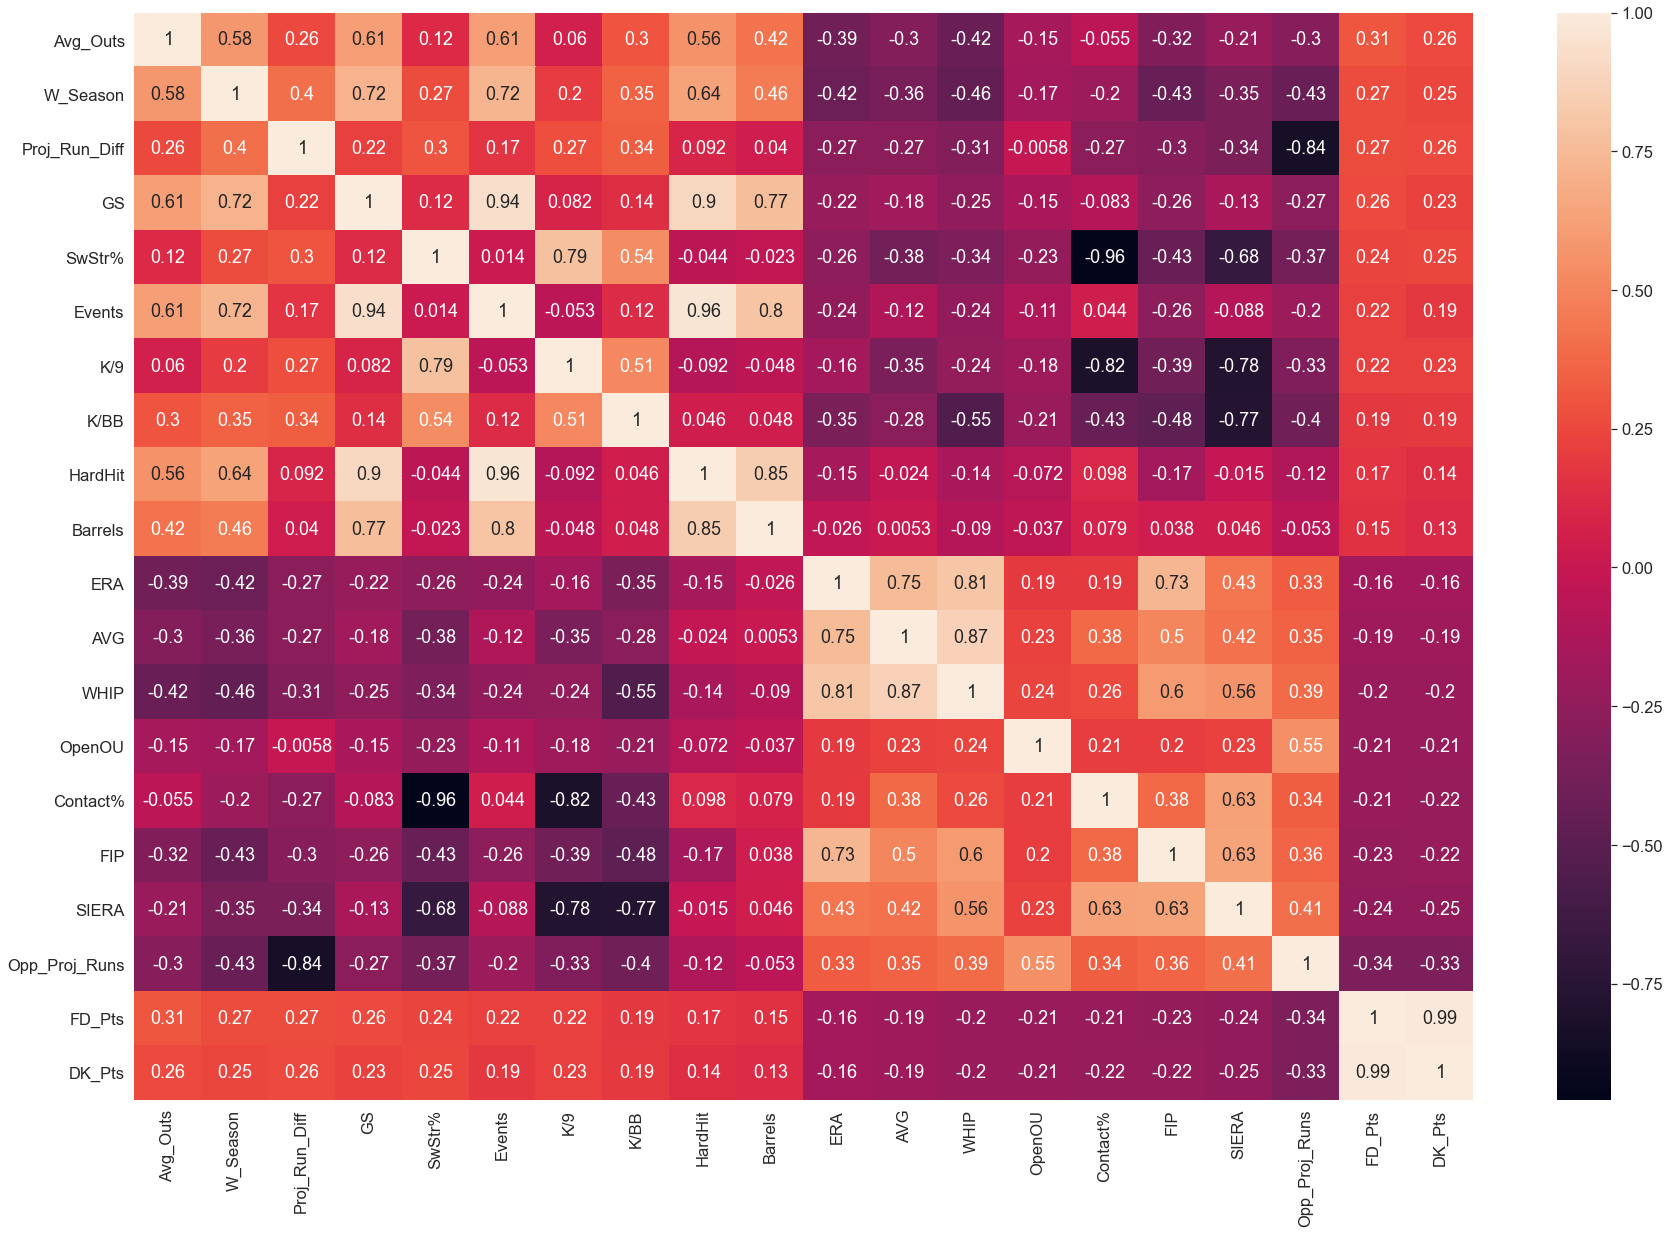

In [208]:
sns.set(font_scale = 1.5)
plt.figure(figsize = (30, 20))
sns.heatmap(main_df_corr, annot = True)

In [209]:
main_df = main_df.set_index(['Date', 'Name', 'Team'])

In [210]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1194 entries, ('2022-08-07', 'Tyler Anderson', 'LAD') to ('2022-06-20', 'Caleb Kilian', 'CHC')
Data columns (total 56 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GS              1194 non-null   float64
 1   Avg_Outs        1194 non-null   float64
 2   W_Season        1194 non-null   float64
 3   ERA             1194 non-null   float64
 4   K/9             1194 non-null   float64
 5   BB/9            1194 non-null   float64
 6   K/BB            1194 non-null   float64
 7   HR/9            1194 non-null   float64
 8   AVG             1194 non-null   float64
 9   BABIP           1194 non-null   float64
 10  FIP             1194 non-null   float64
 11  SIERA           1194 non-null   float64
 12  WHIP            1194 non-null   float64
 13  GB/FB           1194 non-null   float64
 14  LD%             1194 non-null   float64
 15  HR/FB           1194 non-null   float64
 16  RS/9   

In [211]:
X = main_df[best_features]

In [212]:
X.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1194 entries, ('2022-08-07', 'Tyler Anderson', 'LAD') to ('2022-06-20', 'Caleb Kilian', 'CHC')
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Avg_Outs       1194 non-null   float64
 1   W_Season       1194 non-null   float64
 2   Proj_Run_Diff  1194 non-null   float64
 3   GS             1194 non-null   float64
 4   SwStr%         1194 non-null   float64
 5   Events         1194 non-null   float64
 6   K/9            1194 non-null   float64
 7   K/BB           1194 non-null   float64
 8   HardHit        1194 non-null   float64
 9   Barrels        1194 non-null   float64
 10  ERA            1194 non-null   float64
 11  AVG            1194 non-null   float64
 12  WHIP           1194 non-null   float64
 13  OpenOU         1194 non-null   float64
 14  Contact%       1194 non-null   float64
 15  FIP            1194 non-null   float64
 16  SIERA          1194 non-n

In [213]:
y_FD = main_df['FD_Pts']
y_DK = main_df['DK_Pts']

In [214]:
y_FD

Date        Name              Team
2022-08-07  Tyler Anderson    LAD     40
            Zach Davies       ARI     24
            Kevin Gausman     TOR     37
            Triston McKenzie  CLE     58
            Jesus Luzardo     MIA     49
                                      ..
2022-06-20  Zach Davies       ARI     15
            Noah Syndergaard  LAA     22
            Alex Faedo        DET      7
            Jose Berrios      TOR     -3
            Caleb Kilian      CHC      1
Name: FD_Pts, Length: 1194, dtype: int64

In [215]:
X

Avg_Outs  W_Season  Proj_Run_Diff    GS  \
Date       Name             Team                                             
2022-08-07 Tyler Anderson   LAD   17.888889      12.0       0.450000  18.0   
           Zach Davies      ARI   15.375000       2.0       0.950000  16.0   
           Kevin Gausman    TOR   16.750000       8.0       0.800000  20.0   
           Triston McKenzie CLE   18.473684       7.0      -0.800000  19.0   
           Jesus Luzardo    MIA   14.571429       2.0      -0.300000   7.0   
...                                     ...       ...            ...   ...   
2022-06-20 Zach Davies      ARI   15.923077       2.0      -1.734375  13.0   
           Noah Syndergaard LAA   15.300000       4.0       1.487500  10.0   
           Alex Faedo       DET   15.000000       1.0      -1.543750   8.0   
           Jose Berrios     TOR   16.538462       5.0       0.318750  13.0   
           Caleb Kilian     CHC   13.500000       0.0       0.000000   2.0   

                                  SwStr%  Events    K/9  K/BB  HardHit  \
Date       Name             Team                                         
2022-08-07 Tyler Anderson   LAD     12.1   336.0   7.34  4.09     98.0   
           Zach Davies      ARI      8.7   250.0   6.91  2.25     79.0   
           Kevin Gausman    TOR     15.8   311.0  10.64  6.60    121.0   
           Triston McKenzie CLE     12.0   320.0   8.48  3.53    126.0   
           Jesus Luzardo    MIA     13.9    76.0  12.18  2.88     33.0   
...                                  ...     ...    ...   ...      ...   
2022-06-20 Zach Davies      ARI      9.2   204.0   7.43  2.59     63.0   
           Noah Syndergaard LAA     10.2   163.0   6.18  2.69     60.0   
           Alex Faedo       DET     11.1   125.0   7.43  2.75     45.0   
           Jose Berrios     TOR      9.3   219.0   7.79  3.65    103.0   
           Caleb Kilian     CHC      6.5    27.0   6.00  0.86     10.0   

                                  Barrels   ERA    AVG  WHIP  OpenOU  \
Date       Name             Team                                       
2022-08-07 Tyler Anderson   LAD      17.0  2.89  0.223  1.03     9.0   
           Zach Davies      ARI      19.0  4.28  0.230  1.22     8.0   
           Kevin Gausman    TOR      24.0  3.06  0.269  1.24     8.0   
           Triston McKenzie CLE      33.0  3.38  0.203  1.00     8.0   
           Jesus Luzardo    MIA       7.0  3.97  0.172  1.09     8.0   
...                                   ...   ...    ...   ...     ...   
2022-06-20 Zach Davies      ARI      14.0  3.78  0.234  1.20     7.5   
           Noah Syndergaard LAA      11.0  3.53  0.237  1.18     8.5   
           Alex Faedo       DET      10.0  4.28  0.278  1.40     9.5   
           Jose Berrios     TOR      26.0  4.65  0.256  1.24     8.5   
           Caleb Kilian     CHC       0.0  8.00  0.242  1.67     8.5   

                                  Contact%   FIP  SIERA  Opp_Proj_Runs  
Date       Name             Team                                        
2022-08-07 Tyler Anderson   LAD       76.9  3.36   3.95       4.275000  
           Zach Davies      ARI       79.7  4.58   4.52       3.525000  
           Kevin Gausman    TOR       71.6  2.01   2.95       3.600000  
           Triston McKenzie CLE       76.4  4.10   3.88       4.400000  
           Jesus Luzardo    MIA       67.7  3.35   3.31       4.150000  
...                                    ...   ...    ...            ...  
2022-06-20 Zach Davies      ARI       78.6  4.03   4.22       4.617188  
           Noah Syndergaard LAA       79.3  3.72   4.39       3.506250  
           Alex Faedo       DET       77.5  4.40   4.40       5.521875  
           Jose Berrios     TOR       80.8  4.45   4.03       4.090625  
           Caleb Kilian     CHC       84.3  4.46   6.21       4.250000  

[1194 rows x 18 columns]

In [216]:
X_FD_train, X_FD_test, y_FD_train, y_FD_test = train_test_split(X, y_FD, test_size = 0.3, random_state = 43)
X_DK_train, X_DK_test, y_DK_train, y_DK_test = train_test_split(X, y_DK, test_size = 0.3, random_state = 43)

In [217]:
from sklearn.preprocessing import StandardScaler

In [218]:
scaler = StandardScaler()

In [219]:
X_FD_train = scaler.fit_transform(X_FD_train)
X_FD_test = scaler.transform(X_FD_test)
X_DK_train = scaler.fit_transform(X_DK_train)
X_DK_test = scaler.transform(X_DK_test)

In [220]:
X_FD_scaled_df = pd.DataFrame(X_FD_train, columns = X.columns)
X_DK_scaled_df = pd.DataFrame(X_DK_train, columns = X.columns)

In [221]:
X_FD_scaled_df.mean()

Avg_Outs        -1.874748e-17
W_Season         3.331999e-16
Proj_Run_Diff   -6.621450e-17
GS               8.376533e-17
SwStr%           1.535033e-16
Events           4.307931e-17
K/9             -4.423940e-16
K/BB            -1.013162e-16
HardHit          2.161943e-16
Barrels          1.728491e-18
ERA              1.239195e-16
AVG             -3.842568e-16
WHIP             5.694713e-16
OpenOU          -2.257010e-16
Contact%         1.434847e-15
FIP              4.294635e-16
SIERA           -2.645256e-16
Opp_Proj_Runs    1.234541e-16
dtype: float64

In [222]:
X_FD_scaled_df.std()

Avg_Outs         1.000599
W_Season         1.000599
Proj_Run_Diff    1.000599
GS               1.000599
SwStr%           1.000599
Events           1.000599
K/9              1.000599
K/BB             1.000599
HardHit          1.000599
Barrels          1.000599
ERA              1.000599
AVG              1.000599
WHIP             1.000599
OpenOU           1.000599
Contact%         1.000599
FIP              1.000599
SIERA            1.000599
Opp_Proj_Runs    1.000599
dtype: float64

In [223]:
X_DK_scaled_df.mean()

Avg_Outs        -1.874748e-17
W_Season         3.331999e-16
Proj_Run_Diff   -6.621450e-17
GS               8.376533e-17
SwStr%           1.535033e-16
Events           4.307931e-17
K/9             -4.423940e-16
K/BB            -1.013162e-16
HardHit          2.161943e-16
Barrels          1.728491e-18
ERA              1.239195e-16
AVG             -3.842568e-16
WHIP             5.694713e-16
OpenOU          -2.257010e-16
Contact%         1.434847e-15
FIP              4.294635e-16
SIERA           -2.645256e-16
Opp_Proj_Runs    1.234541e-16
dtype: float64

In [224]:
X_DK_scaled_df.std()

Avg_Outs         1.000599
W_Season         1.000599
Proj_Run_Diff    1.000599
GS               1.000599
SwStr%           1.000599
Events           1.000599
K/9              1.000599
K/BB             1.000599
HardHit          1.000599
Barrels          1.000599
ERA              1.000599
AVG              1.000599
WHIP             1.000599
OpenOU           1.000599
Contact%         1.000599
FIP              1.000599
SIERA            1.000599
Opp_Proj_Runs    1.000599
dtype: float64

In [225]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

In [226]:
from sklearn.metrics import mean_absolute_error

In [227]:
base_LR_FD = LinearRegression()
base_LR_DK = LinearRegression()
base_RF_FD = RandomForestRegressor()
base_RF_DK = RandomForestRegressor()
base_GB_FD = GradientBoostingRegressor()
base_GB_DK = GradientBoostingRegressor()
base_AB_FD = AdaBoostRegressor()
base_AB_DK = AdaBoostRegressor()
base_XGB_FD = XGBRegressor()
base_XGB_DK = XGBRegressor()

In [228]:
model_list_FD = [base_LR_FD, base_RF_FD, base_GB_FD, base_AB_FD, base_XGB_FD]
model_list_DK = [base_LR_DK, base_RF_DK, base_GB_DK, base_AB_DK, base_XGB_DK]

In [229]:
for model in model_list_FD:
    model_name = str(model)
    model.fit(X_train, y_FD_train)
    y_FD_pred = model.predict(X_test)
    print(f"{model_name} R_squared_train: {model.score(X_train, y_FD_train)}")
    print(f"{model_name} R_squared_test: {model.score(X_test, y_FD_test)}")
    print(f"{model_name} MAE: {mean_absolute_error(y_FD_test, y_FD_pred)}")
    print(f"{model_name} MSE: {mean_squared_error(y_FD_test, y_FD_pred)}")
    print(f"{model_name} RMSE: {mean_squared_error(y_FD_test, y_FD_pred, squared = False)}")
    print()
    

LinearRegression() R_squared_train: 0.20180995373804944
LinearRegression() R_squared_test: 0.1971620695168932
LinearRegression() MAE: 12.192276418555357
LinearRegression() MSE: 227.52894520868057
LinearRegression() RMSE: 15.084062622804261

RandomForestRegressor() R_squared_train: 0.8788972966385409
RandomForestRegressor() R_squared_test: 0.16598086775295784
RandomForestRegressor() MAE: 12.236573816155989
RandomForestRegressor() MSE: 236.36587938718665
RandomForestRegressor() RMSE: 15.374195243562722

GradientBoostingRegressor() R_squared_train: 0.5714535245900355
GradientBoostingRegressor() R_squared_test: 0.1746427279773023
GradientBoostingRegressor() MAE: 12.23853899017833
GradientBoostingRegressor() MSE: 233.91105775313136
GradientBoostingRegressor() RMSE: 15.29415109619136

AdaBoostRegressor() R_squared_train: 0.3083146209183547
AdaBoostRegressor() R_squared_test: 0.13834508480286833
AdaBoostRegressor() MAE: 12.478688247895027
AdaBoostRegressor() MSE: 244.19802122541066
AdaBoostRe

In [230]:
for model in model_list_DK:
    model_name = str(model)
    model.fit(X_train, y_DK_train)
    y_DK_pred = model.predict(X_test)
    print(f"{model_name} R_squared_train: {model.score(X_train, y_DK_train)}")
    print(f"{model_name} R_squared_test: {model.score(X_test, y_DK_test)}")
    print(f"{model_name} MAE: {mean_absolute_error(y_DK_test, y_DK_pred)}")
    print(f"{model_name} MSE: {mean_squared_error(y_DK_test, y_DK_pred)}")
    print(f"{model_name} RMSE: {mean_squared_error(y_DK_test, y_DK_pred, squared = False)}")
    print()
    

LinearRegression() R_squared_train: 0.18583255805941257
LinearRegression() R_squared_test: 0.1640338382537725
LinearRegression() MAE: 8.240286227295627
LinearRegression() MSE: 105.4046954936522
LinearRegression() RMSE: 10.266678893081842

RandomForestRegressor() R_squared_train: 0.8815751167268069
RandomForestRegressor() R_squared_test: 0.13228608444884005
RandomForestRegressor() MAE: 8.143256267409472
RandomForestRegressor() MSE: 109.40768326462394
RandomForestRegressor() RMSE: 10.459812773880035

GradientBoostingRegressor() R_squared_train: 0.5647320831144971
GradientBoostingRegressor() R_squared_test: 0.11203595312558756
GradientBoostingRegressor() MAE: 8.278736691044603
GradientBoostingRegressor() MSE: 111.96096714560697
GradientBoostingRegressor() RMSE: 10.58116095452701

AdaBoostRegressor() R_squared_train: 0.2729802220095524
AdaBoostRegressor() R_squared_test: 0.085442486205897
AdaBoostRegressor() MAE: 8.532968860969298
AdaBoostRegressor() MSE: 115.31406492762153
AdaBoostRegress

In [48]:
# base_LR_FD = LinearRegression()
# base_LR_FD.fit(X_train, y_FD_train)
# y_FD_pred = base_LR_FD.predict(X_test)

# print(f"R_squared_train: {base_LR_FD.score(X_train, y_FD_train)}")
# print(f"R_squared_test: {base_LR_FD.score(X_test, y_FD_test)}")
# print(f"Mean Absolute Error: {mean_absolute_error(y_FD_test, y_FD_pred)}")

R_squared_train: 0.21998751553333518
R_squared_test: 0.18935419781678475
Mean Absolute Error: 12.328237485325364


**Baseline Linear Regression with 13 features:**<br>
R_squared_train: 0.18071066533848312<br>
R_squared_test: 0.19072120487638278<br>
Mean Absolute Error: 12.24811229330219<br>

**Baseline Linear Regression with 18 features:**<br>
R_squared_train: 0.20180995373804955<br>
R_squared_test: 0.1971620695168933<br>
Mean Absolute Error: 12.192276418555357<br>

**Baseline Linear Regression with 29 features:**<br>
R_squared_train: 0.21998751553333518<br>
R_squared_test: 0.18935419781678475<br>
Mean Absolute Error: 12.328237485325364<br>

In [231]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [234]:
param_grid = {'alpha': np.arange(0, 1, .01)}
Lasso_model_FD = Lasso(random_state = 43)
Lasso_CV = GridSearchCV(Lasso_model_FD, param_grid, cv = 5, scoring = 'neg_mean_absolute_error')
Lasso_CV.fit(X_FD_train, y_FD_train)
print(f"Lasso_model_FD best params: {Lasso_CV.best_params_}")
print(f"Lasso_model_FD best score: {Lasso_CV.best_score_}")

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68626.39362512217, tolerance: 17.34829520958084
  model = cd_fast.enet_coordinate_descent(
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator


Lasso_model_FD best params: {'alpha': 0.0}
Lasso_model_FD best score: -11.87471791019752


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86202.70875546659, tolerance: 21.59954491017964
  model = cd_fast.enet_coordinate_descent(


In [239]:
best_lasso_FD = Lasso(alpha = 0, random_state = 43)
best_lasso_FD.fit(X_FD_train, y_FD_train)
y_FD_pred = best_lasso_FD.predict(X_FD_test)
print(f"best_lasso_FD Train R-squared: {best_lasso_FD.score(X_FD_train, y_FD_train)}")
print(f"best_lasso_FD Test R-squared: {best_lasso_FD.score(X_FD_test, y_FD_test)}")
print(f"best_lasso_FD MAE: {mean_absolute_error(y_FD_test, y_FD_pred)}")
print(f"best_lasso_FD RMSE: {mean_squared_error(y_FD_test, y_FD_pred, squared = False)}")
print(f"best_lasso_FD MSE: {mean_squared_error(y_FD_test, y_FD_pred)}")

best_lasso_FD Train R-squared: 0.20180995373804955
best_lasso_FD Test R-squared: 0.1971620695168934
best_lasso_FD MAE: 12.192276418555357
best_lasso_FD RMSE: 15.08406262280426
best_lasso_FD MSE: 227.52894520868048


<ipython-input-239-8e139c10e308>:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  best_lasso_FD.fit(X_FD_train, y_FD_train)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86202.70875546659, tolerance: 21.59954491017964
  model = cd_fast.enet_coordinate_descent(


In [240]:
param_grid = {'alpha': np.arange(0, 1, .01)}
Lasso_model_DK = Lasso(random_state = 43)
Lasso_CV = GridSearchCV(Lasso_model_DK, param_grid, cv = 5, scoring = 'neg_mean_absolute_error')
Lasso_CV.fit(X_DK_train, y_DK_train)
print(f"Lasso_model_DK best params: {Lasso_CV.best_params_}")
print(f"Lasso_model_DK best score: {Lasso_CV.best_score_}")

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31550.483630909057, tolerance: 7.854443208083833
  model = cd_fast.enet_coordinate_descent(
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

Lasso_model_DK best params: {'alpha': 0.07}
Lasso_model_DK best score: -8.037979542702704


In [241]:
best_lasso_DK = Lasso(alpha = 0.07, random_state = 43)
best_lasso_DK.fit(X_DK_train, y_DK_train)
y_DK_pred = best_lasso_DK.predict(X_DK_test)
print(f"best_lasso_DK Train R-squared: {best_lasso_DK.score(X_DK_train, y_DK_train)}")
print(f"best_lasso_DK Test R-squared: {best_lasso_DK.score(X_DK_test, y_DK_test)}")
print(f"best_lasso_DK MAE: {mean_absolute_error(y_DK_test, y_DK_pred)}")
print(f"best_lasso_DK RMSE: {mean_squared_error(y_DK_test, y_DK_pred, squared = False)}")
print(f"best_lasso_DK MSE: {mean_squared_error(y_DK_test, y_DK_pred)}")

best_lasso_DK Train R-squared: 0.17882054358023602
best_lasso_DK Test R-squared: 0.1710378804158993
best_lasso_DK MAE: 8.155051115971023
best_lasso_DK RMSE: 10.223579358622228
best_lasso_DK MSE: 104.5215749020465


In [244]:
#Tuned Random Forest
param_grid = {'max_depth': [3, 5, 7, 9], 'n_estimators': [100, 200, 300, 400, 500], 'criterion': ['absolute_error']}

In [ ]:
RF_FD_cv = GridSearchCV(base_RF_FD, param_grid, n_jobs = 2, verbose = 3, random_state = 43)
RF_FD_cv.fit(X_FD_train, y_FD_train)
print(f"Tuned Random Forest FD Best Estimator: {RF_FD_cv.best_estimator_}")
print(f"Tuned Random Forest FD Best Score: {RF_FD_cv.best_score_}")
print(f"Tuned Random Forest FD Best Params: {RF_FD_cv.best_params_}")